# EE658/758 Machine Learning in Engineering Assignment

## 1. Data Preprocessing

In [2]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # For Data Splitting 
df = pd.read_csv('insurance.csv')
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

Age           int64
Gender       object
BMI         float64
Children      int64
Smoker       object
Region       object
Expenses    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Gender    1332 non-null   object 
 2   BMI       1330 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1336 non-null   object 
 6   Expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,Age,BMI,Children,Expenses
count,1338.000000,1330.000000,1338.000000,1337.000000
mean,39.207025,30.676917,1.136024,13273.306111
std,14.049960,6.094868,3.194662,12114.083012
min,18.000000,16.000000,-65.000000,1121.870000
25%,27.000000,26.300000,0.000000,4738.270000
50%,39.000000,30.400000,1.000000,9377.900000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,70.000000,63770.430000


In [7]:
df.isnull().sum()

Age         0
Gender      6
BMI         8
Children    0
Smoker      0
Region      2
Expenses    1
dtype: int64

In [8]:
df[df['Gender'].isnull()]

,Age,Gender,BMI,Children,Smoker,Region,Expenses
425,45,NaN,24.3,5,no,southeast,9788.87
572,30,NaN,43.1,2,no,southeast,4753.64
729,41,NaN,36.1,1,no,southeast,6781.35
914,33,NaN,24.6,2,no,northwest,5257.51
1313,19,NaN,34.7,2,yes,southwest,36397.58
1334,18,NaN,31.9,0,no,northeast,2205.98


In [9]:
df[df['BMI'].isnull()]

,Age,Gender,BMI,Children,Smoker,Region,Expenses
8,37,male,NaN,2,no,northeast,6406.41
283,55,female,NaN,1,no,northeast,11879.10
580,59,male,NaN,1,no,northeast,12913.99
769,38,female,NaN,2,no,northwest,6933.24
946,42,male,NaN,2,no,southwest,7160.09
1100,33,female,NaN,2,yes,northeast,16776.30
1235,26,male,NaN,0,no,northwest,2699.57
1335,18,female,NaN,0,no,southeast,1629.83


In [10]:
df[df['Expenses'].isnull()]

,Age,Gender,BMI,Children,Smoker,Region,Expenses
810,46,female,30.8,3,no,southwest,NaN


In [11]:
df[df['Region'].isnull()]

,Age,Gender,BMI,Children,Smoker,Region,Expenses
652,48,female,31.1,0,no,NaN,8280.62
788,29,male,22.5,3,no,NaN,5209.58


In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Expenses    0
dtype: int64

In [14]:
df[df.duplicated()]

,Age,Gender,BMI,Children,Smoker,Region,Expenses
581,19,male,30.6,0,no,northwest,1639.56


In [15]:
df[(df['Age'] == 19) & (df['Gender'] =='male') & (df['BMI'] == 30.6)]

,Age,Gender,BMI,Children,Smoker,Region,Expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df[df.duplicated()]

,Age,Gender,BMI,Children,Smoker,Region,Expenses


In [18]:
df['Gender'].value_counts()

Gender
male      668
female    652
Name: count, dtype: int64

In [19]:
df['Smoker'].value_counts()

Smoker
no     1048
yes     272
Name: count, dtype: int64

In [20]:
df['Region'].value_counts()

Region
southeast    359
southwest    322
northwest    321
northeast    318
Name: count, dtype: int64

### Encoding 

In [21]:
gender_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'no': 0, 'yes': 1}

df['Gender'] = df['Gender'].map(gender_mapping)
df['Smoker'] = df['Smoker'].map(smoker_mapping)

In [22]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [23]:
region_mapping = {'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4}
df['Region'] = df['Region'].map(region_mapping)

In [24]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


In [25]:
df.dtypes

Age           int64
Gender        int64
BMI         float64
Children      int64
Smoker        int64
Region        int64
Expenses    float64
dtype: object

### Min Max Scaling 

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
# Expenses column is Taregt COlumn
features_to_normalize = ['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region']
features_to_normalize

['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region']

In [28]:
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [29]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Expenses
0,0.021739,1.0,0.320755,0.481481,1.0,0.333333,16884.92
1,0.000000,0.0,0.479784,0.488889,0.0,0.000000,1725.55
2,0.217391,0.0,0.458221,0.503704,0.0,0.000000,4449.46
3,0.326087,0.0,0.180593,0.481481,0.0,0.666667,21984.47
4,0.304348,0.0,0.347709,0.481481,0.0,0.666667,3866.86


## 2. Splitting the Data

In [30]:
X = df.drop('Expenses',axis=1) # Features
Y = df['Expenses']  # Labels 

In [31]:
X.head()

,Age,Gender,BMI,Children,Smoker,Region
0,0.021739,1.0,0.320755,0.481481,1.0,0.333333
1,0.000000,0.0,0.479784,0.488889,0.0,0.000000
2,0.217391,0.0,0.458221,0.503704,0.0,0.000000
3,0.326087,0.0,0.180593,0.481481,0.0,0.666667
4,0.304348,0.0,0.347709,0.481481,0.0,0.666667


In [32]:
Y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: Expenses, dtype: float64

In [33]:
# Split Ratio ---> 75:25
# Training : Testing 
# Random_State for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [34]:
print("X_train:\n", X_train.head(1))
print("\nX_test:\n", X_test.head(1))
print("\ny_train:\n", y_train.head(1))
print("\ny_test:\n", y_test.head(1))

X_train:
           Age  Gender       BMI  Children  Smoker    Region
587  0.347826     1.0  0.382749  0.488889     1.0  0.666667

X_test:
          Age  Gender       BMI  Children  Smoker  Region
685  0.76087     0.0  0.280323  0.496296     0.0     1.0

y_train:
 587    43943.88
Name: Expenses, dtype: float64

y_test:
 685    11244.38
Name: Expenses, dtype: float64


## 3. Gradient Descent Implementation

In [35]:
X_train.head()

,Age,Gender,BMI,Children,Smoker,Region
587,0.347826,1.0,0.382749,0.488889,1.0,0.666667
356,0.608696,0.0,0.752022,0.503704,0.0,0.000000
992,0.695652,1.0,0.420485,0.496296,0.0,0.333333
464,0.021739,0.0,0.247978,0.481481,0.0,0.666667
950,0.847826,0.0,0.061995,0.481481,0.0,1.000000


In [36]:
y_train.head()

587    43943.88
356     8944.12
992    10118.42
464     1632.04
950    11534.87
Name: Expenses, dtype: float64

In [37]:
from sklearn.metrics import mean_squared_error
def gradient_descent(X_train, y_train, learning_rate=0.01, n_iterations=10000, decay_rate=None):
    if len(X_train.shape) == 1: # For 1D Conversion 
        X_train = X_train.reshape(-1, 1)
        
    if len(y_train.shape) == 1: # For 1D Conversion since ytrain is seris so using numpy here 
        y_train = y_train.to_numpy().reshape(-1, 1)

    # X bias term
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Data points and features
    m, n = X_train.shape[0],X_train.shape[0]

    # Weight matrix (W^T)
    W = np.random.randn(X_train.shape[1] + 1, 1)

    loss_values = []

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y_train)
        
        if decay_rate:
            current_learning_rate = learning_rate / (1 + decay_rate * iteration)
        else:
            current_learning_rate = learning_rate
        
        W = W - current_learning_rate * gradients
        predictions = X_b.dot(W)
        loss_values.append(mean_squared_error(y_train, predictions))
        
        #result_string = f"Coefficient and Intercept of the Model: {W}\nLoss Values:\n{loss_values}"
        #print(result_string)

gradient_descent(X_train, y_train) # With Constant_Rate 

In [38]:
# Learning Rate Analysis with 0.01 
gradient_descent(X_train, y_train, decay_rate=0.01)

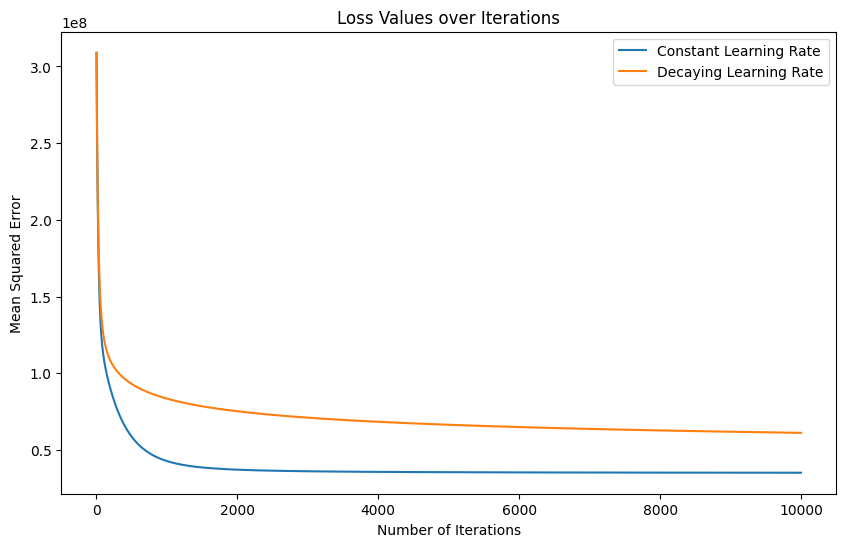

In [39]:
# Plot for Consant & Decay Learning Rates
def gradient_descent(X_train, y_train, learning_rate=0.01, n_iterations=10000, decay_rate=None):
    if len(X_train.shape) == 1: # For 1D Conversion 
        X_train = X_train.reshape(-1, 1)
        
    if len(y_train.shape) == 1: # For 1D Conversion since ytrain is seris so using numpy here 
        y_train = y_train.to_numpy().reshape(-1, 1)

    # X bias term
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

    # Data points and features
    m, n = X_train.shape[0], X_train.shape[1]

    # Weight matrix (W^T)
    W_constant = np.random.randn(n + 1, 1)
    W_decaying = np.random.randn(n + 1, 1)

    loss_values_constant = []
    loss_values_decaying = []

    for iteration in range(n_iterations):

        gradients_constant = 1/m * X_b.T.dot(X_b.dot(W_constant) - y_train)
        W_constant = W_constant - learning_rate * gradients_constant
        predictions_constant = X_b.dot(W_constant)
        loss_values_constant.append(mean_squared_error(y_train, predictions_constant))

        gradients_decaying = 1/m * X_b.T.dot(X_b.dot(W_decaying) - y_train)
        if decay_rate:
            current_learning_rate_decaying = learning_rate / (1 + decay_rate * iteration)
        else:
            current_learning_rate_decaying = learning_rate
        W_decaying = W_decaying - current_learning_rate_decaying * gradients_decaying
        predictions_decaying = X_b.dot(W_decaying)
        loss_values_decaying.append(mean_squared_error(y_train, predictions_decaying))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iterations + 1), loss_values_constant, label='Constant Learning Rate')
    plt.plot(range(1, n_iterations + 1), loss_values_decaying, label='Decaying Learning Rate')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('Loss Values over Iterations')
    plt.legend()
    plt.show()

    return W_constant, loss_values_constant, W_decaying, loss_values_decaying

W_constant, loss_values_constant, W_decaying, loss_values_decaying = gradient_descent(X_train, y_train, decay_rate=0.01)

## 4. Model Evaluation

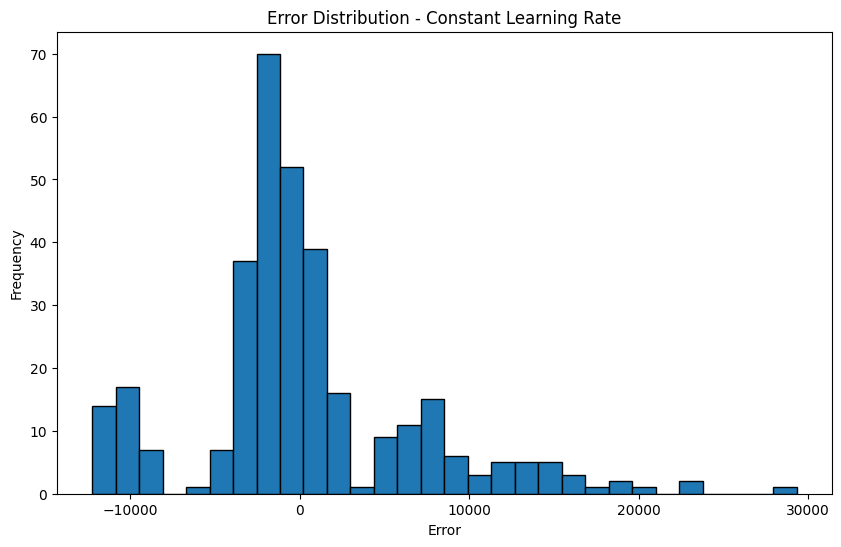

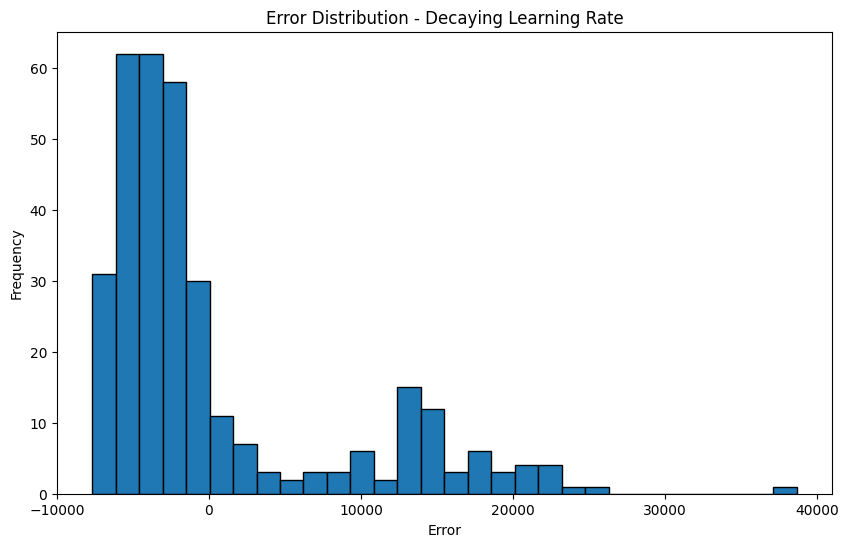

Constant Learning Rate:
MAE: 4543.38
MSE: 43794979.02

Decaying Learning Rate:
MAE: 5988.32
MSE: 65776966.98


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def evaluate_model(X_test, y_test, W_constant, W_decaying):
    if len(X_test.shape) == 1: # For 1D Conversion 
        X_test = X_test.reshape(-1, 1)
        
    if len(y_test.shape) == 1: # For 1D Conversion since ytrain is seris so using numpy here 
        y_test = y_test.to_numpy().reshape(-1, 1)

    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


    predictions_test_constant = X_test_b.dot(W_constant)
    predictions_test_decaying = X_test_b.dot(W_decaying)

    # Computing MAE and MSE for both constant and decaying learning rates
    mae_constant = mean_absolute_error(y_test, predictions_test_constant)
    mse_constant = mean_squared_error(y_test, predictions_test_constant)

    mae_decaying = mean_absolute_error(y_test, predictions_test_decaying)
    mse_decaying = mean_squared_error(y_test, predictions_test_decaying)

    # Histogram For Consstant 
    error_distribution_constant = y_test - predictions_test_constant
    plt.figure(figsize=(10, 6))
    plt.hist(error_distribution_constant, bins=30, edgecolor='black')
    plt.title('Error Distribution - Constant Learning Rate')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

    # Histogram For Decying Rate 
    error_distribution_decaying = y_test - predictions_test_decaying
    plt.figure(figsize=(10, 6))
    plt.hist(error_distribution_decaying, bins=30, edgecolor='black')
    plt.title('Error Distribution - Decaying Learning Rate')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

    print("Constant Learning Rate:")
    print(f"MAE: {mae_constant:.2f}")
    print(f"MSE: {mse_constant:.2f}")

    print("\nDecaying Learning Rate:")
    print(f"MAE: {mae_decaying:.2f}")
    print(f"MSE: {mse_decaying:.2f}")

# Example usage
evaluate_model(X_test, y_test, W_constant, W_decaying)


## 5. Learning Rate Analysis

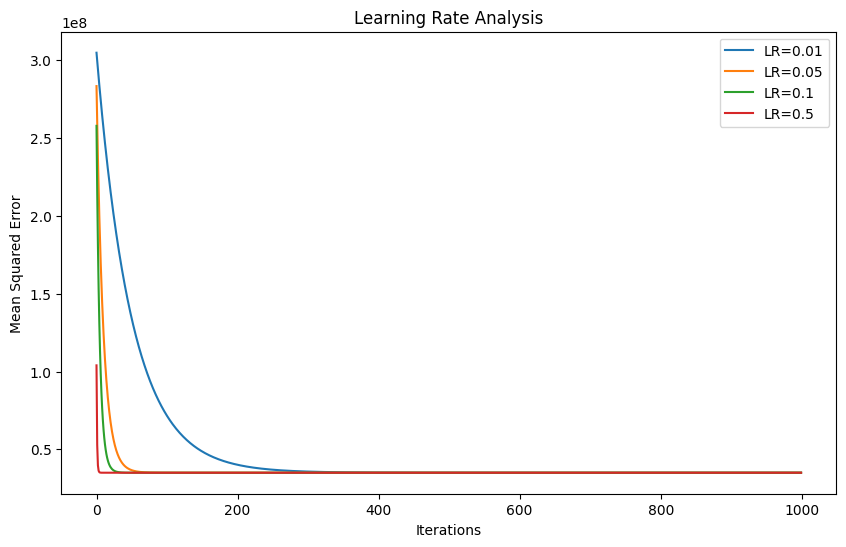

In [41]:
from sklearn.preprocessing import StandardScaler

def learning_rate_analysis(X, y, learning_rates, n_iterations=1000):

    # Convert y to a NumPy array if it's a Pandas Series
    if isinstance(y, pd.Series):
        y = y.to_numpy()

    # 2d to 1D Conversion
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
    if len(y.shape) == 1:
        y = y.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    W = np.random.randn(X_train_scaled.shape[1] + 1, 1)

    X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

    loss_values = []

    for learning_rate in learning_rates:
        W_current = W.copy()

        local_loss_values = []  

        for iteration in range(n_iterations):
            gradients = 1/X_train_b.shape[0] * X_train_b.T.dot(X_train_b.dot(W_current) - y_train)
            W_current = W_current - learning_rate * gradients

            predictions = X_train_b.dot(W_current)
            local_loss_values.append(mean_squared_error(y_train, predictions))

        loss_values.append(local_loss_values)

    plt.figure(figsize=(10, 6))
    for i, learning_rate in enumerate(learning_rates):
        plt.plot(range(n_iterations), loss_values[i], label=f'LR={learning_rate}')

    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Rate Analysis')
    plt.legend()
    plt.show()

    return loss_values

learning_rates_to_analyze = [0.01, 0.05, 0.1, 0.5]
loss_values = learning_rate_analysis(X, Y, learning_rates_to_analyze)

## 6. Scikit-learn Implementation

In [42]:
from sklearn.linear_model import LinearRegression
def scikit_learn_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()

    model.fit(X_train_scaled, y_train)

    predictions = model.predict(X_test_scaled)

    # MSE & MAE Comparsion
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return mae, mse

mae, mse = scikit_learn_regression(X, Y)
print("MAE:", mae)
print("MSE:", mse)

MAE: 4743.839512329654
MSE: 47119179.47700916


## 7. Normal Equation Implementation

In [43]:
def normal_equation_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

    theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

    X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

    predictions = X_test_b.dot(theta)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)

    return mae, mse

mae_normal, mse_normal = normal_equation_regression(X, Y)
print("MAE (Normal Equation):", mae_normal)
print("MSE (Normal Equation):", mse_normal)


MAE (Normal Equation): 4743.839512329654
MSE (Normal Equation): 47119179.477009155


#### Observation 💡💡💡:
- MAE and MSE are almost Same for Linear Regression Model and Normal Equation because both use Linear Regression Model 

In [44]:
# MAE & MSE Calcualtion for Gradient_Descent 
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, decay_rate=None):
    if len(X.shape) == 1:  # For 1D Conversion
        X = X.reshape(-1, 1)

    if len(y.shape) == 1:  # For 1D Conversion since ytrain is series so using numpy here
        y = y.to_numpy().reshape(-1, 1)

    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    m, n = X.shape[0], X.shape[1]

    W = np.random.randn(n + 1, 1)

    loss_values = []

    for iteration in range(n_iterations):
        gradients = 1/m * X_b.T.dot(X_b.dot(W) - y)

        if decay_rate:
            current_learning_rate = learning_rate / (1 + decay_rate * iteration)
        else:
            current_learning_rate = learning_rate

        W = W - current_learning_rate * gradients
        predictions = X_b.dot(W)
        loss_values.append(mean_squared_error(y, predictions))

    return W, loss_values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

W_gradient_descent, loss_values_gradient_descent = gradient_descent(X_train_scaled, y_train)
mae_gradient_descent = mean_absolute_error(y_test, np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled].dot(W_gradient_descent))
mse_gradient_descent = mean_squared_error(y_test, np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled].dot(W_gradient_descent))
print(f"Gradient Descent - MAE: {mae_gradient_descent:.4f}, MSE: {mse_gradient_descent:.4f}")


Gradient Descent - MAE: 4618.5731, MSE: 45290930.4499


In [45]:
import time
np.random.seed(42)
X = np.random.rand(1000, 5)
theta_true = np.random.rand(6, 1)
X_b = np.c_[np.ones((1000, 1)), X]
y = X_b.dot(theta_true) + np.random.randn(1000, 1) * 0.1  # Adding noise for realism
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Computational efficiency for Gradient Descent
start_time = time.time()
W_gradient_descent, _ = gradient_descent(X_train_scaled, y_train)
end_time = time.time()
mae_gradient_descent = mean_absolute_error(y_test, np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled].dot(W_gradient_descent))
mse_gradient_descent = mean_squared_error(y_test, np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled].dot(W_gradient_descent))
ct_gradient = end_time-start_time
print(f"Gradient Descent - Time: {ct_gradient:.4f}s, MAE: {mae_gradient_descent:.4f}, MSE: {mse_gradient_descent:.4f}")

# For Normal Equation
start_time = time.time()
mae_normal, mse_normal = normal_equation_regression(X_train, y_train)
end_time = time.time()
ct_normal = end_time-start_time
print(f"Normal Equation - Time: {ct_normal:.4f}s, MAE: {mae_normal:.4f}, MSE: {mse_normal:.4f}")

# For scikit-learn Linear Regression
start_time = time.time()
mae_scikit_learn, mse_scikit_learn = scikit_learn_regression(X_train, y_train)
end_time = time.time()
ct_scikit_learn = end_time - start_time 
print(f"Scikit-learn Linear Regression - Time: {ct_scikit_learn:.4f}s, MAE: {mae_scikit_learn:.4f}, MSE: {mse_scikit_learn:.4f}")

Gradient Descent - Time: 0.7779s, MAE: 0.0897, MSE: 0.0120
Normal Equation - Time: 0.0000s, MAE: 0.0860, MSE: 0.0118
Scikit-learn Linear Regression - Time: 0.0105s, MAE: 0.0860, MSE: 0.0118


In [46]:
mae_gradient_descent,mae_normal,mae_scikit_learn

(0.089650517747645, 0.086048081464194, 0.08604808146419404)

In [47]:
mse_gradient_descent,mse_normal,mse_scikit_learn

(0.012018391740325483, 0.011786053686983744, 0.011786053686983738)

In [48]:
ct_gradient,ct_normal,ct_scikit_learn

(0.7779483795166016, 0.0, 0.01051473617553711)

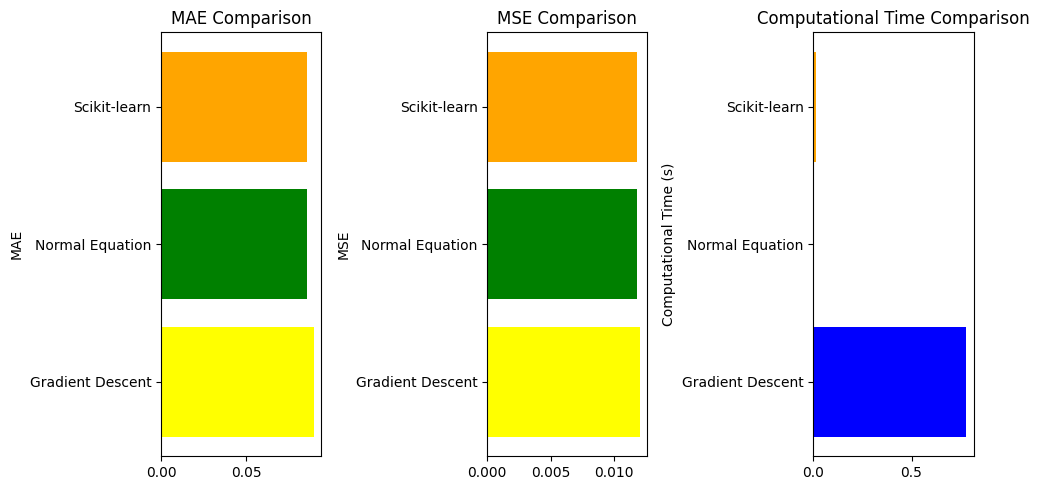

In [51]:
import matplotlib.pyplot as plt

# Values
mae_values = [mae_gradient_descent, mae_normal, mae_scikit_learn]
mse_values = [mse_gradient_descent, mse_normal, mse_scikit_learn]
ct_values = [ct_gradient, ct_normal, ct_scikit_learn]

# Types
methods = ['Gradient Descent', 'Normal Equation', 'Scikit-learn']

# MAE plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.barh(methods, mae_values, color=['yellow', 'green', 'orange'])
plt.title('MAE Comparison')
plt.ylabel('MAE')

# MSE Plot
plt.subplot(1, 3, 2)
plt.barh(methods, mse_values, color=['yellow', 'green', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('MSE')

# Computational Time Plot
plt.subplot(1, 3, 3)
plt.barh(methods, ct_values, color=['blue', 'green', 'orange'])
plt.title('Computational Time Comparison')
plt.ylabel('Computational Time (s)')

plt.tight_layout()
plt.show()
